In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("pd_speech_features.csv")




In [26]:


# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 755 entries, Unnamed: 0 to Unnamed: 754
dtypes: object(755)
memory usage: 4.4+ MB


(  Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0         id     gender               PPE        DFA       RPDE  numPulses   
 1          0          1           0.85247    0.71826    0.57227        240   
 2          0          1           0.76686    0.69481    0.53966        234   
 3          0          1           0.85083    0.67604    0.58982        232   
 4          1          0           0.41121    0.79672    0.59257        178   
 
          Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
 0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
 1               239        0.00806353            8.68E-05       0.00218  ...   
 2               233       0.008258256            7.31E-05       0.00195  ...   
 3               231        0.00833959            6.04E-05       0.00176  ...   
 4               177       0.010857733         0.000182739       0.00419  ...   
 
                 Unnamed: 745       

In [27]:
# Preprocessing
data.columns = data.columns.str.strip()  # Clean column names
data = data.dropna(axis=0, how="any")  # Drop rows with missing values



In [28]:


# Extract features and target
features = data.iloc[:, 2:-1]  # Assuming features start at column 3
target = data.iloc[:, -1]      # Assuming target is the last column



In [29]:


# Handle target parsing issues
features = features.apply(pd.to_numeric, errors='coerce')
target = target.replace("class", pd.NA).dropna().astype(int)  # Clean target column
features = features.loc[target.index]  # Align features with valid target rows



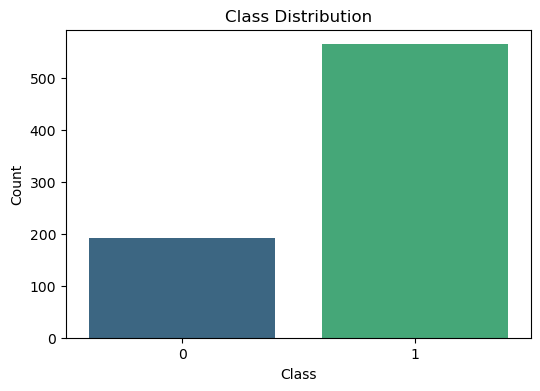

In [30]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [31]:


# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



In [32]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)



In [33]:

# Train SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:

# Evaluate the model
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8325991189427313
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66        61
           1       0.86      0.92      0.89       166

    accuracy                           0.83       227
   macro avg       0.79      0.76      0.77       227
weighted avg       0.83      0.83      0.83       227



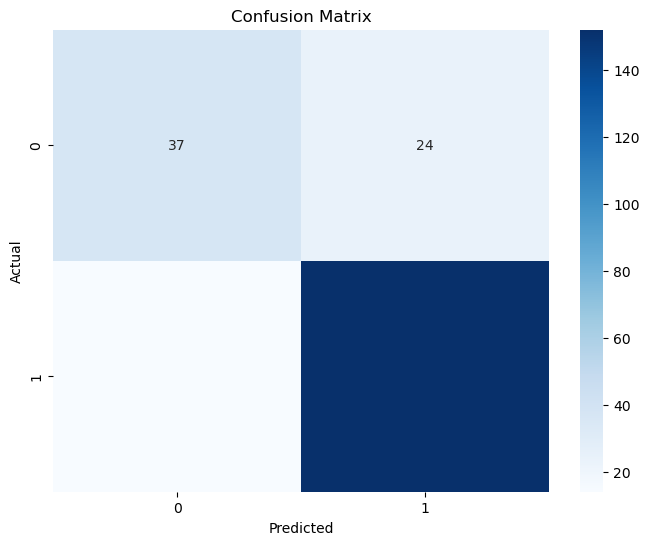

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



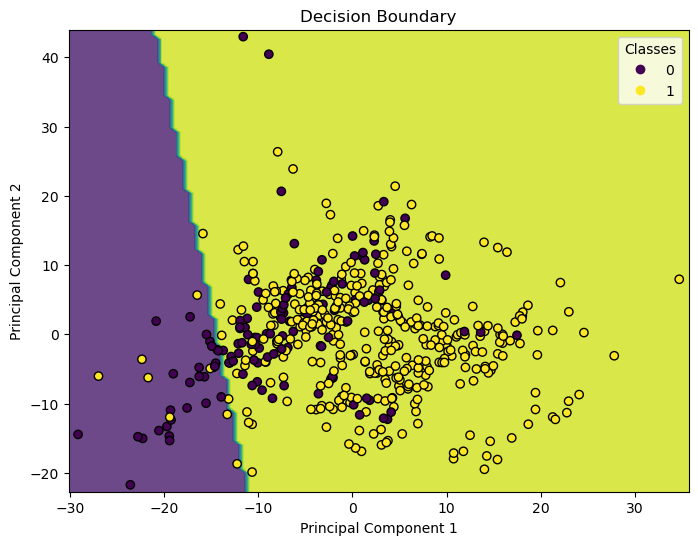

In [36]:

# Visualize decision boundary (using PCA for 2D reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

svm_model_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(
    np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
    np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100)
)
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="viridis")
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap="viridis", edgecolor="k")
plt.title("Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()